In [2]:
########################################################################
# This notebook aims to do EDA and develope a model on Instagram Reach #
########################################################################

In [3]:
# Part 1.) Expolatory Data Analysis  

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [3]:
# loading and checking data
dataFrame = pd.read_csv('/kaggle/input/instagram-reach/instagram_reach.csv')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [4]:
dataFrame[0:5]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


OBJECTIVES:


1.) WORD CLOUD PLOT FOR CAPTIONS AND HASHTAGS TO OBSERVE THE WORDS BEING USED.

2.) OBSERVE THE RELATION BETWEEK LIKES AND FOLLOWERS/ TIME SINCE POSTED.


In [5]:
# lets know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = dataFrame[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 
    

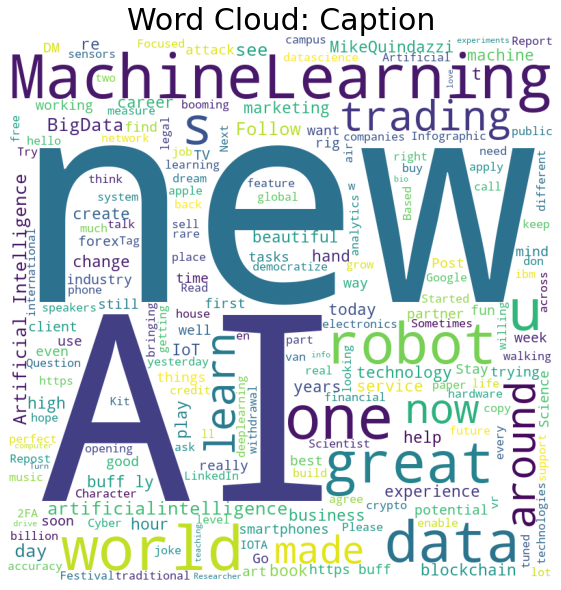

In [6]:
WordCloudPlotter('Caption')

Caption Word Cloud indicates the following:


1.) This data sets is collected from DATA enthusiasts.

2.) It is emphasizing on the need of AI-ML.

3.) Fields of applications are being talked about


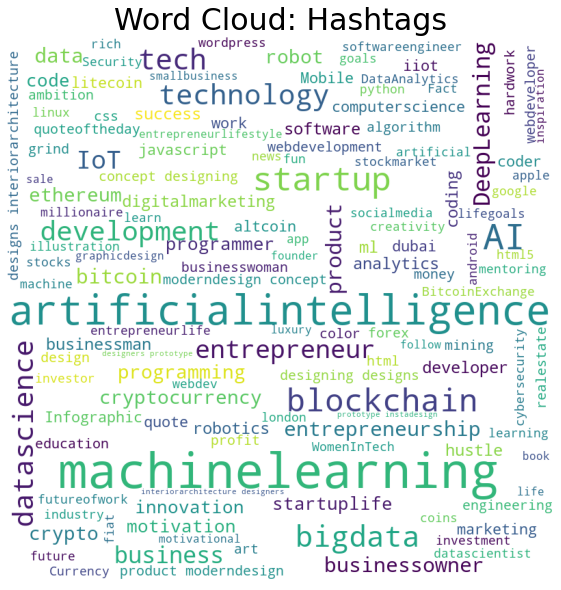

In [7]:
# WORLD CLOUD for hashtags
WordCloudPlotter('Hashtags')

In [8]:
# removing hours and typecasting to int
dataFrame['Time since posted'] = dataFrame['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [9]:
dataFrame['Time since posted']

0     11
1      2
2      2
3      3
4      3
      ..
95     3
96     3
97     3
98     3
99     3
Name: Time since posted, Length: 100, dtype: int64

In [10]:
# Plotting Likes relationship with
# Followers and Hours since posted
def PlotData(featureVector):
    plt.figure(figsize=(20, 10))

    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2, pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for ' + str(mem))
        
        # Convert the column to numeric data type
        dataFrame[mem] = pd.to_numeric(dataFrame[mem])
        
        sns.regplot(data=dataFrame, x=mem, y='Likes', color='red')
        pltNum += 1

    plt.show()


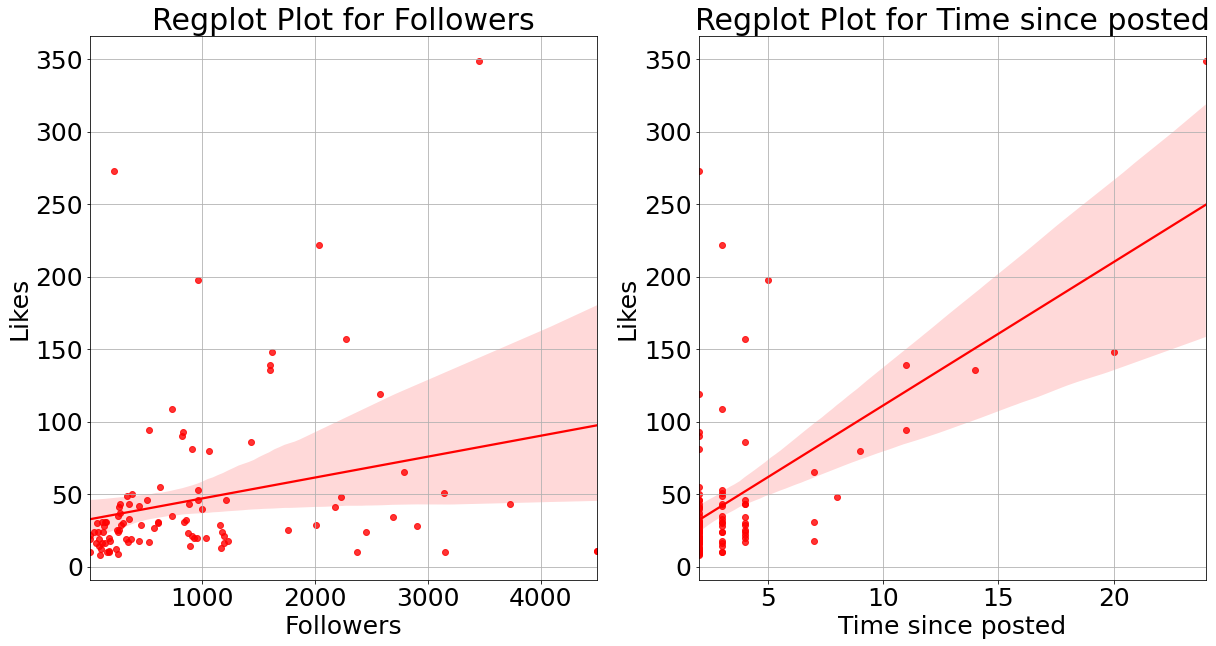

In [11]:
PlotData(['Followers', 'Time since posted'])

In [12]:
##############################################################################
# Part 2.) Predictive Modelling                                              #
##############################################################################

In [13]:
# We may use 2 features numeric features for predicting no: of likes

# gathering features
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(dataFrame['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))


Max value of target is 349.0


In [14]:
#diving targets by max values
targets = targets/maxValLikes

In [15]:
# TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, ytrain, ytest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)


In [16]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [17]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [19]:
# for sake of conviniece 
# lets choose our model as 
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_norm, ytrain)

GradientBoostingRegressor()

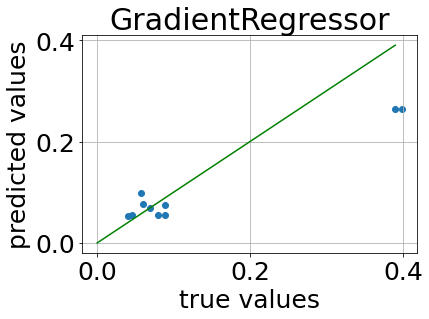

In [21]:
# doing Some Benchmarks
predictions = gbr.predict(X_test_norm)
plt.scatter(ytest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [22]:
gbr.fit(X_train_std, ytrain)

GradientBoostingRegressor()

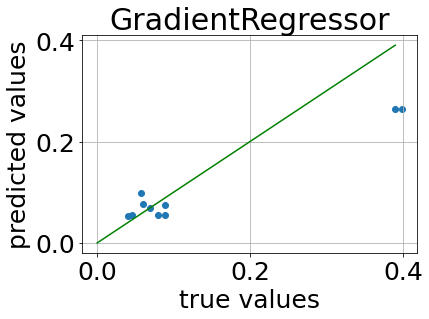

In [23]:
predictions = gbr.predict(X_test_std)
plt.scatter(ytest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

We used Standard Scaler transform and Min Max scaler transform on the input data to train a Gradient boosting regressor model. The results are similar.